<a href="https://colab.research.google.com/github/ChiriKamau/5.2/blob/main/DIP_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETI 5207 Digital Image Processing - Assignment 1

## Name: Levis Chiri Kamau

## Reg No: E020-01-1166/2021

###Date: 2nd December 2025



In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, filters, util
from scipy.ndimage import convolve

%matplotlib inline

###Question 1
(a) Plot a histogram of the image fig_q1.jpg provided.

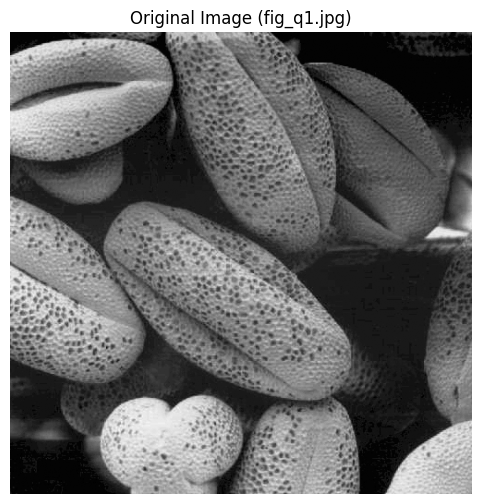

In [73]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['image.cmap'] = 'gray'

img_path = 'fig_q1.jpg'
image = io.imread(img_path, as_gray=True)
show_image(image, "Original Image (fig_q1.jpg)")

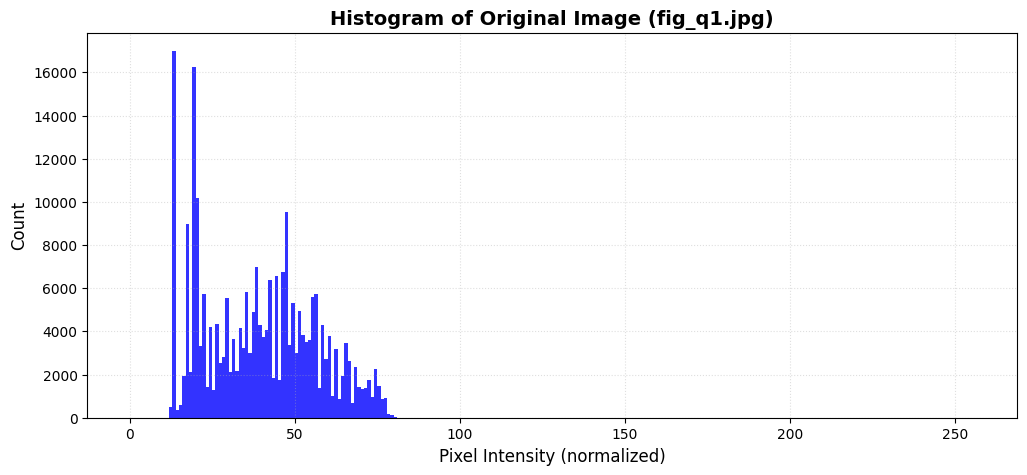

In [63]:
hist, bins_center = exposure.histogram(image)

plt.figure(figsize=(12, 5))
plt.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.8)
plt.title('Histogram of Original Image (fig_q1.jpg)', fontsize=14, fontweight='bold')
plt.xlabel('Pixel Intensity (normalized)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)
plt.show()

###Observation:
The histogram shows that the majority of pixel intensities are concentrated near 0 (the left side of the graph). This indicates that the image is very dark and has low contrast.

###(b)
 Determine an appropriate power law transformation to improve the contrast of the image fig_q1.jpg provided and apply the transformation. Plot the images side by side and comment on the results obtained.

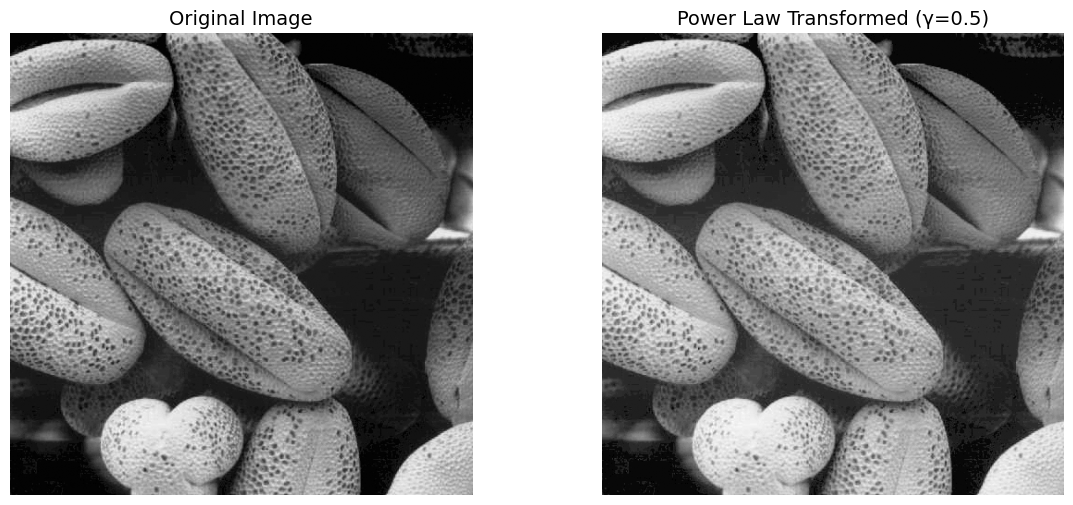

In [78]:
# Apply Gamma Correction (Power Law). Gamma < 1 brightens the image (Lecture 4 concept)
gamma_value = 0.5
img_gamma = exposure.adjust_gamma(image, gamma_value)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=14)
ax1.axis('off')
ax2.imshow(img_gamma)
ax2.set_title(f'Power Law Transformed (\u03B3={gamma_value})', fontsize=14)
ax2.axis('off')
plt.show()

..

**Observation:**
The application of the Power Law (Gamma) transformation with $\gamma = 0.5$ significantly improved the interpretability of the image.

* **Problem:** The original image was heavily underexposed, with most details of the pollen grains hidden in the low-intensity (shadow) regions.
* **Solution:** The Power Law transformation $s = c r^\gamma$ with $\gamma < 1$ acts as a non-linear mapping. It expands the narrow band of dark input values into a wider range of output intensities.
* **Result:** As seen in the right-hand plot, this "stretching" of the dark values reveals the texture and surface features of the pollen grains without washing out the brighter areas, effectively utilizing the display's dynamic range.

###
 (c)
 Apply histogram normalisation to the image fig_q1.jpg provided and compare the initial and processed histograms.

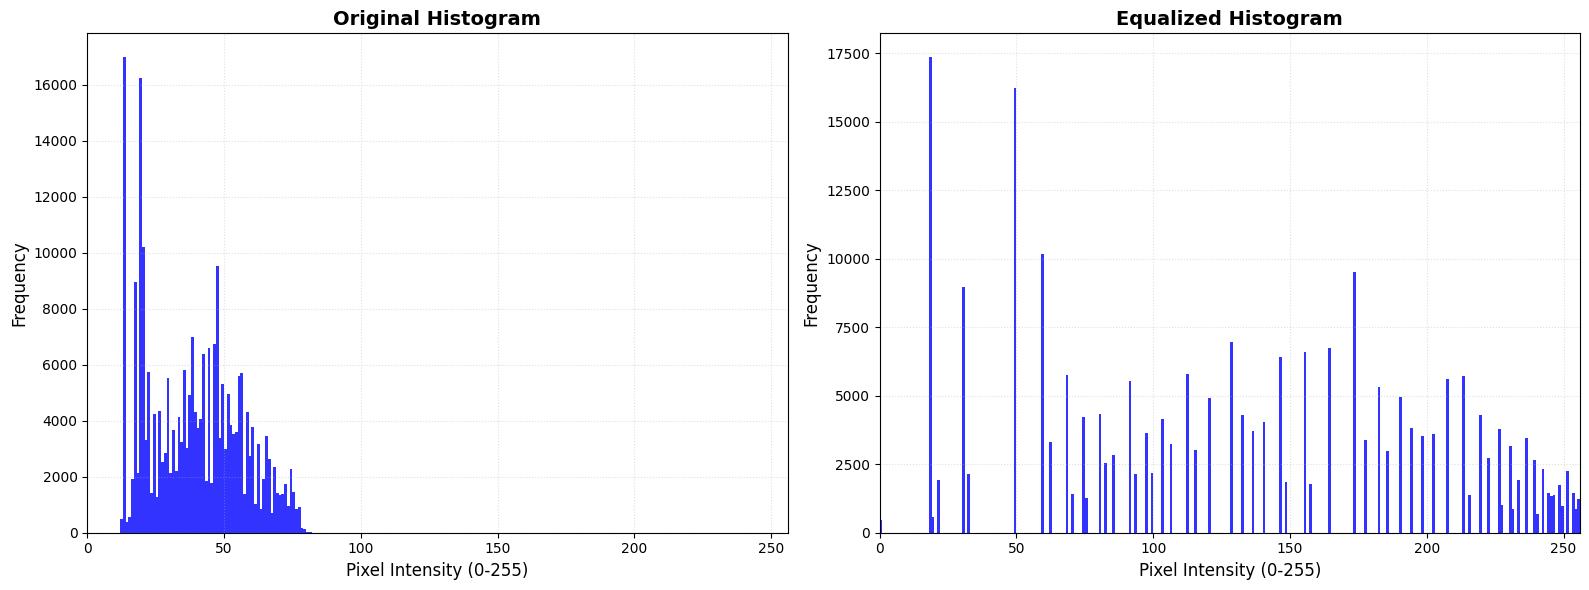

In [70]:
from skimage import img_as_ubyte


img_eq_float = exposure.equalize_hist(image)
img_eq = img_as_ubyte(img_eq_float)


plt.figure(figsize=(16, 6))


kwargs = dict(bins=256, range=[0, 256], color='blue', alpha=0.8)

# Original Histogram
plt.subplot(1, 2, 1)

plt.hist(image.ravel(), **kwargs)
plt.title('Original Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Pixel Intensity ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([0, 256])
plt.grid(True, linestyle=':', alpha=0.4)

# Equalized Histogram
plt.subplot(1, 2, 2)
plt.hist(img_eq.ravel(), color='blue', bins=256, range=[0, 256], alpha=0.8)
plt.title('Equalized Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Pixel Intensity (0-255)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([0, 256])
plt.grid(True, linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

Histogram normalization (equalization) redistributed the pixel intensities so that they span the entire range from 0 to 255 more uniformly. While the original histogram was bunched up near 0 (dark), the processed histogram uses the full dynamic range. This results in an image with very high contrast, although sometimes it can introduce noise or make the image look somewhat unnatural compared to the smoother Power Law transformation.

##Question 2
For the image in fig_q2.jpg:(a) Apply box kernels of size $3 \times 3$, $5 \times 5$ and $7 \times 7$ and comment on the results.

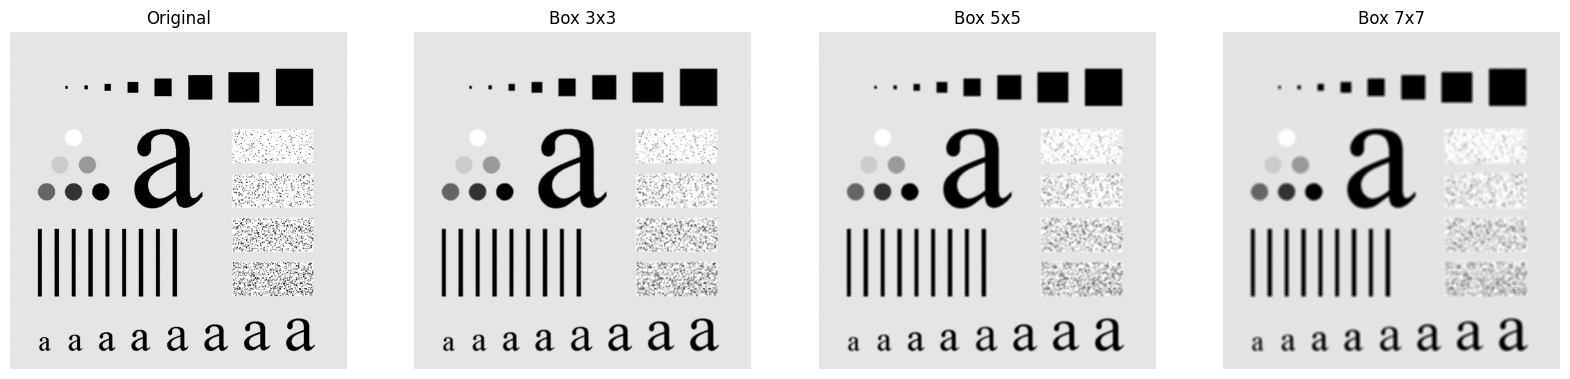

In [57]:

img2_path = 'fig_q2.jpg'
image2 = io.imread(img2_path, as_gray=True)


def apply_box_kernel(img, size):
    # Create a normalized box kernel
    kernel = np.ones((size, size)) / (size ** 2)
    # Convolve
    return convolve(img, kernel)

# Apply 3x3, 5x5, 7x7
box_3 = apply_box_kernel(image2, 3)
box_5 = apply_box_kernel(image2, 5)
box_7 = apply_box_kernel(image2, 7)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(image2, cmap='gray'); axes[0].set_title('Original')
axes[1].imshow(box_3, cmap='gray'); axes[1].set_title('Box 3x3')
axes[2].imshow(box_5, cmap='gray'); axes[2].set_title('Box 5x5')
axes[3].imshow(box_7, cmap='gray'); axes[3].set_title('Box 7x7')
for ax in axes: ax.axis('off')
plt.show()

**Observation:**
The application of Box Filters (Average Filtering) demonstrates the trade-off between noise reduction and detail preservation.


The box filter acts as a linear low-pass filter. By replacing each pixel with the unweighted average of its neighborhood, it smooths out rapid intensity changes (noise) but also suppresses high-frequency edge information.

**Kernel Size Impact:**

$3 \times 3$ Kernel: This small window successfully reduces the finest grain of the "salt-and-pepper" noise in the background while keeping the text characters relatively sharp. The noise is dampened but still visible.

$5 \times 5$  and  $7 \times 7$ Kernels: As the kernel size increases, the blurring effect becomes dominant. While the background noise is almost entirely eliminated in the $7 \times 7$ image, the spatial resolution is severely degraded.  The sharp edges of the square blocks and the serif details of the letter 'a' are lost, resulting in a "blocky" or out-of-focus appearance. This confirms that larger box kernels cause significant loss of edge fidelity.

###(b)
Apply Gaussian kernels of size $3 \times 3$, $5 \times 5$ and $7 \times 7$ where $w(s, t) = K e^{-\frac{s^2+t^2}{2\sigma^2}}$ with $K=1$ and $\sigma = 1, 2$ and comment on the results.

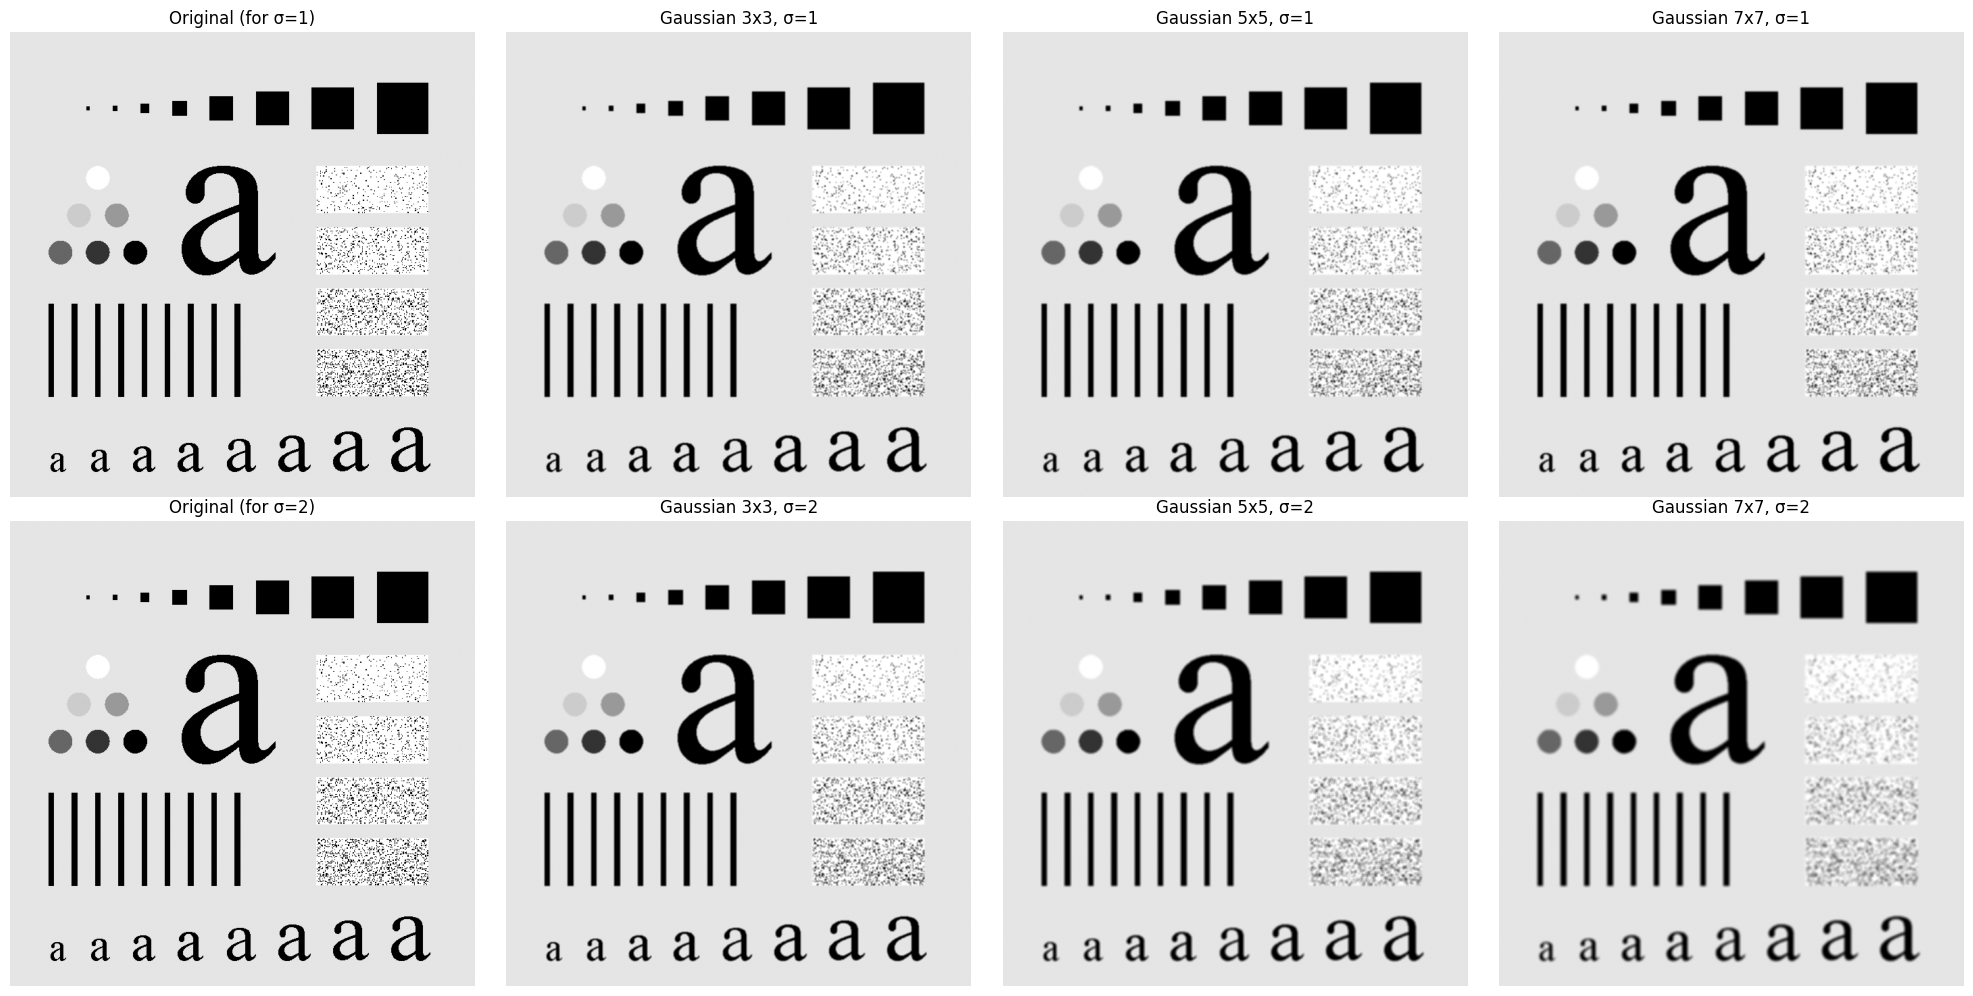

In [58]:

sigmas = [1, 2]
sizes_approx = [3, 5, 7]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, sigma in enumerate(sigmas):
    # Plot Original in first column
    axes[i, 0].imshow(image2, cmap='gray')
    axes[i, 0].set_title(f'Original (for \u03C3={sigma})')
    axes[i, 0].axis('off')

    for j, size in enumerate(sizes_approx):
        # Apply Gaussian filter
        # truncate is used to limit the kernel size roughly to the requested window
        trunc = (size - 1) / 2.0 / sigma

        img_gauss = filters.gaussian(image2, sigma=sigma, truncate=trunc)

        axes[i, j+1].imshow(img_gauss, cmap='gray')
        axes[i, j+1].set_title(f'Gaussian {size}x{size}, \u03C3={sigma}')
        axes[i, j+1].axis('off')

plt.tight_layout()
plt.show()

**Observation:**
The Gaussian filter demonstrates superior performance in balancing noise reduction with feature preservation compared to the Box filter.

* **Effect of Sigma ($\sigma$):**
    The standard deviation ($\sigma$) controls the "spread" of the Gaussian function, acting as a tuning parameter for the smoothing strength.
    * **At $\sigma=1$:** The filter provides **conservative smoothing**. The narrow bell curve means only the immediate neighbors significantly influence the center pixel. This effectively suppresses the fine-grain noise while keeping the edges of the letter 'a' and the bars sharp and distinct.
  * **At $\sigma=2$:** The filter applies **aggressive smoothing**. The wider bell curve incorporates a broader area of influence. While this successfully eliminates almost all background texture noise, it causes noticeable **edge attenuation**, making the text and shapes appear softer and "out of focus."

* **Comparison with Box Filter:**
    * **Natural Smoothing:** The Gaussian kernel is isotropic (circularly symmetric), whereas the Box filter is rectangular. As a result, the Gaussian blur looks more natural and does not introduce the artificial "blockiness" or square artifacts seen in the Box filter results.
    * **Weighted Average:** The Gaussian filter preserves edges better because it calculates a **weighted average**—assigning the highest weight to the center pixel and decreasing weight with distance ($e^{-r^2}$). In contrast, the Box filter treats even distant corner pixels with equal importance to the center, which smears edge details significantly more at larger kernel sizes.

In [80]:
print('.')


.
